In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]


# 1. Initial Scraping 

__Source 1__ : [LiveUaMap](https://liveuamap.com/)
The website sources data from on-ground reports through platforms like
1. Telegram Groups 
2. Twitter Users 
3. Official Government Posts (Ukraine facebook page, Gov notification pages)

![title](../assets/liveupmap.png)


<br>

### Scraping Process
- Scraped 50 posts every day
- Used Selenium to scrape the posts 



## 1.1 Initial Data Description


> Going forward, each of the following datapoint will be referred to as __reference__

__Dataset Description__

|column|description|
|-|-|
|UID|Id of each reference|
|Title|Title of each reference|
|Source| Source of each reference (twitter / telegram / facebook)|
|Time-Capture|System Time when the |
|Time|Time as posted on the article|
|Full-Text|Full text given on the site for a reference|
|Geo|Geo Tag of the reference|


In [2]:
raw_data = '../data/raw/2022-02-24 08_57_08__843437.csv'
rawDF = pd.read_csv(raw_data)

In [3]:
rawDF.head()

,Unnamed: 0,uid,title,time,source,time-capture,sc,domain,full-text,sc2,geo
0,0,cce3b1f5-30e8-4e5e-8f90-c28d042ca1ef,4 ballistic missiles launched from the territo...,6 minutes ago,https://twitter.com/skrypinua/status/149684144...,2022-02-24 08:42:24.960035,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n6 minutes...,False,51°56′N 30°5′E
1,1,484aa636-ccdb-4ed9-8852-cdf5a81fccd1,"Russian troops in Genichesk, Kherson Oblast",9 minutes ago,https://twitter.com/aldin_ww/status/1496840790...,2022-02-24 08:42:29.593235,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n10 minute...,False,46°10′N 34°48′E
2,2,f96bea6b-2b71-4b79-a80c-24ac620c8795,Czech republic withdraw its ambassadors from R...,19 minutes ago,https://twitter.com/michaelh992/status/1496838...,2022-02-24 08:42:34.699685,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n20 minute...,False,50°5′N 14°23′E
3,3,4c6ad1b6-7549-48d2-8611-91445df98013,Ukrainian State Border Guard says that Ukraini...,29 minutes ago,https://twitter.com/Archer83Able/status/149683...,2022-02-24 08:42:41.200882,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n30 minute...,False,50°56′N 34°41′E
4,4,2f789c83-a9e8-45fc-9a6a-52204d3ae887,Ukraine FM Kuleba:Ukraine has severed diplomat...,36 minutes ago,https://twitter.com/DmytroKuleba/status/149683...,2022-02-24 08:42:45.664485,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n37 minute...,False,50°27′N 30°31′E


## 1.2 Examples of Reference Dataset 

In [4]:
print('ID\n',rawDF.iloc[0]['uid'],'\n')
print('TITLE\n',rawDF.iloc[0]['title'],'\n')
print('TIME\n',rawDF.iloc[0]['time'],'\n')
print('TIME-CAPTURE\n',rawDF.iloc[0]['time-capture'],'\n')
print('SRC\n',rawDF.iloc[0]['source'],'\n')
print('GEO\n',rawDF.iloc[0]['geo'],'\n')
print('FULL-TEXT\n',rawDF.iloc[0]['full-text'],'\n')

ID
 cce3b1f5-30e8-4e5e-8f90-c28d042ca1ef 

TITLE
 4 ballistic missiles launched from the territory of the Republic of Belarus in the south-western direction 

TIME
 6 minutes ago 

TIME-CAPTURE
 2022-02-24 08:42:24.960035 

SRC
 https://twitter.com/skrypinua/status/1496841447282298885 

GEO
 51°56′N 30°5′E 

FULL-TEXT
 SourceOn live map
Tell friends
6 minutes ago - 51°56′N 30°5′E
4 ballistic missiles launched from the territory of the Republic of Belarus in the south-western direction
Jump to map
Belarus
#Belarus
Other languages:
Українська
Watch more
Syria
Russian warplanes bombard the areas of "Tal Al-Khader, Tardin and Jabal Barzeh" in the northern countryside of Lattakia with missiles
Iran
1 of 13 Iranian boats harassing U.S. warships in Strait of Hormuz today: 5th Fleet
Israel-Palestine
Rocket impact in Sderot earlier this evening
Show comments 



In [5]:
print('ID\n',rawDF.iloc[10]['uid'],'\n')
print('TITLE\n',rawDF.iloc[10]['title'],'\n')
print('TIME\n',rawDF.iloc[10]['time'],'\n')
print('TIME-CAPTURE\n',rawDF.iloc[10]['time-capture'],'\n')
print('SRC\n',rawDF.iloc[10]['source'],'\n')
print('GEO\n',rawDF.iloc[10]['geo'],'\n')
print('FULL-TEXT\n',rawDF.iloc[10]['full-text'],'\n')

ID
 49daafdb-9bf4-461e-8d63-4c57b9151973 

TITLE
 Boris Johnson has released a message to the nation in response to the Russian invasion of Ukraine "Our worst fears have come true and all our warnings have proved tragically accurate," he said 

TIME
 2 hours ago 

TIME-CAPTURE
 2022-02-24 08:43:16.348270 

SRC
 https://twitter.com/politicshome/status/1496819097018974212 

GEO
 51°30′N 0°7′W 

FULL-TEXT
 SourceOn live map
Tell friends
2 hours ago - 51°30′N 0°7′W
Boris Johnson has released a message to the nation in response to the Russian invasion of Ukraine "Our worst fears have come true and all our warnings have proved tragically accurate," he said
Jump to map
London, England
#Russia#UK
Watch more
Syria
Russian warplanes bombard the areas of "Tal Al-Khader, Tardin and Jabal Barzeh" in the northern countryside of Lattakia with missiles
Iran
1 of 13 Iranian boats harassing U.S. warships in Strait of Hormuz today: 5th Fleet
Israel-Palestine
Rocket impact in Sderot earlier this evening
S

In [6]:
print('ID\n',rawDF.iloc[15]['uid'],'\n')
print('TITLE\n',rawDF.iloc[15]['title'],'\n')
print('TIME\n',rawDF.iloc[15]['time'],'\n')
print('TIME-CAPTURE\n',rawDF.iloc[15]['time-capture'],'\n')
print('SRC\n',rawDF.iloc[15]['source'],'\n')
print('GEO\n',rawDF.iloc[15]['geo'],'\n')
print('FULL-TEXT\n',rawDF.iloc[15]['full-text'],'\n')

ID
 0e050103-2acb-4a79-99ab-ba91a6d89bf0 

TITLE
 Turkey foreign ministry calls on Russia to 'stop unjust and unlawful' war 

TIME
 2 hours ago 

TIME-CAPTURE
 2022-02-24 08:43:42.640431 

SRC
 https://twitter.com/AFP/status/1496809439021735941 

GEO
 39°54′N 32°48′E 

FULL-TEXT
 SourceOn live map
Tell friends
2 hours ago - 39°54′N 32°48′E
Turkey foreign ministry calls on Russia to 'stop unjust and unlawful' war
Jump to map
Ankara
#Russia#Turkey
Watch more
Syria
Russian warplanes bombard the areas of "Tal Al-Khader, Tardin and Jabal Barzeh" in the northern countryside of Lattakia with missiles
Iran
1 of 13 Iranian boats harassing U.S. warships in Strait of Hormuz today: 5th Fleet
Israel-Palestine
Rocket impact in Sderot earlier this evening
Show comments 



### Initial Observations 

1. Due to the nature of the website (serve as live updates for the ukranian people), the __title has to be precise and to the point__
2. Time is relative and needs to be synced by offset with the time-capture field

------------------

# 2. News Report Dataset Collection

GOAL : For each reference, collect the corresponding news reporting from different news media outlets and analyze how reporting is done, given that the reference is fairly concise and factual. 

## 2.1 News Scraping 

### Process and Methods 
- Use __hotwords__ from the reference along with a time period to create a search term 
    - ```python 
    def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result 
        ```
- Use Google advanced search queries for finding articles within range of dates 
- __+2 Days__ picked as the time period for the search query. 
- Using __selenium__ to automate the google search process (libraries like googlesearch had severe ratelimits therefore selenium helped bypass them by adding random scroll and other human operations to bypass the ratelimits.)
- Used __newspaper3K__ to scrape news articles. 


__Example of a search Query__
>'major', 'internet', 'disruption', 'vinasterisk', 'network', 'vinnytsia', 'oblast', 'western', 'ukraine', 'operator', 'massive', 'cyberattack', 'elements', 'sabotage' after:2022-03-13 before:2022-03-15<br><br>
> The __''__ assure that the search terms are an exact match and the date parameters filter the range of dates. 



## 2.2 News Data Exploration

__Dataset Description__
- The final dataset we work with consists of 2 types of columns, __article columns__ and __reference columns__. 
- Reference columns are part of the reference dataset (liveuamap).
- Article columns contain information pertaining to the articles. 

|column|description|
|-|-|
|art_uid| UID of the refrence|
|art_article_date|Article Posting Date (scraped by newspaper3k)|
|art_article_text|Article Text (scraped by newspaper3k)|
|art_article_author|Article Author (scraped by newspaper3k)|
|art_article_url|Article URL|
|ref_uid|Article UID|
|ref_title|Reference Title|

__Domain Generation__
- Used __Regex__ to convert URL's into domains 
```python
    m = df['art_article_url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
```


In [7]:
newsDF = pd.read_csv('../data/processed/author-parse-articles.csv')

In [8]:
m = newsDF['art_article_url'].str.extract('(?<=http://)(.*?)(?=/)|(?<=https://)(.*?)(?=/)')
m = m[0].fillna(m[1]).fillna(newsDF['art_article_url'])
newsDF['art_extracted_domain'] = m

In [9]:
newsDF.head()

,Unnamed: 0,art_Unnamed: 0,art_uid,art_article_author,art_article_date,art_article_text,art_article_url,ref_Unnamed: 0,ref_Unnamed: 0.1,ref_uid,...,ref_time,ref_source,ref_time-capture,ref_sc,ref_domain,ref_full-text,ref_sc2,ref_geo,ref_time_parsed,art_extracted_domain
0,0,5,02b5cecd-fac3-4b89-80a2-5bc7d3356d51,['Jake Epstein'],2022-04-04 00:00:00,Lithuania's top diplomat said buying Russian o...,https://www.businessinsider.com/lithuania-dipl...,16,16,02b5cecd-fac3-4b89-80a2-5bc7d3356d51,...,4 hours ago,https://twitter.com/idreesali114/status/151098...,2022-04-04 13:47:10.051481,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n4 hours a...,False,54°41′N 25°16′E,2022-04-04 09:50:58,www.businessinsider.com
1,1,1,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,"['Martin Belam', 'Léonie Chao-Fong', 'Gloria O...",2022-04-04 00:00:00,"This live blog is now closed, you can follow a...",https://www.theguardian.com/world/live/2022/ap...,17,17,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,...,4 hours ago,https://twitter.com/prm_ua/status/151097769528...,2022-04-04 13:47:14.411519,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n4 hours a...,False,50°38′N 29°55′E,2022-04-04 09:50:58,www.theguardian.com
2,2,2,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,['Writer Smith'],2022-04-04 17:59:18+00:00,The Prosecutor General’s Office was able to re...,https://news84media.com/russia-ukraine/the-wor...,17,17,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,...,4 hours ago,https://twitter.com/prm_ua/status/151097769528...,2022-04-04 13:47:14.411519,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n4 hours a...,False,50°38′N 29°55′E,2022-04-04 09:50:58,news84media.com
3,3,3,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,['Scott Lucas'],2022-04-04 06:24:08+01:00,Larisa Savenko outside her damaged house in Bu...,https://eaworldview.com/2022/04/ukraine-war-bu...,17,17,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,...,4 hours ago,https://twitter.com/prm_ua/status/151097769528...,2022-04-04 13:47:14.411519,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n4 hours a...,False,50°38′N 29°55′E,2022-04-04 09:50:58,eaworldview.com
4,4,4,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,"['Iryna Khalip', 'Natallia Radzina', 'Andrei S...",2022-04-04 00:00:00,AFU Repels Enemy Attacks On All Fronts 8 4.04....,https://charter97.org/en/news/2022/4/4/462037/,17,17,8ea2c08f-d9ff-4aa8-b710-9b6f26c7bb39,...,4 hours ago,https://twitter.com/prm_ua/status/151097769528...,2022-04-04 13:47:14.411519,False,"data:image/svg+xml;base64,PHN2ZyB2ZXJzaW9uPSIx...",SourceOn live map\r\nTell friends\r\n4 hours a...,False,50°38′N 29°55′E,2022-04-04 09:50:58,charter97.org


## Dataset Initial Statistics and Insights

In [14]:
matplotlib.rcParams['figure.figsize'] = [20, 10]


In [15]:
most_scraped = list(newsDF.groupby('art_extracted_domain')['art_extracted_domain'].count().sort_values(ascending=False)[:50].index)

<AxesSubplot:xlabel='art_extracted_domain'>

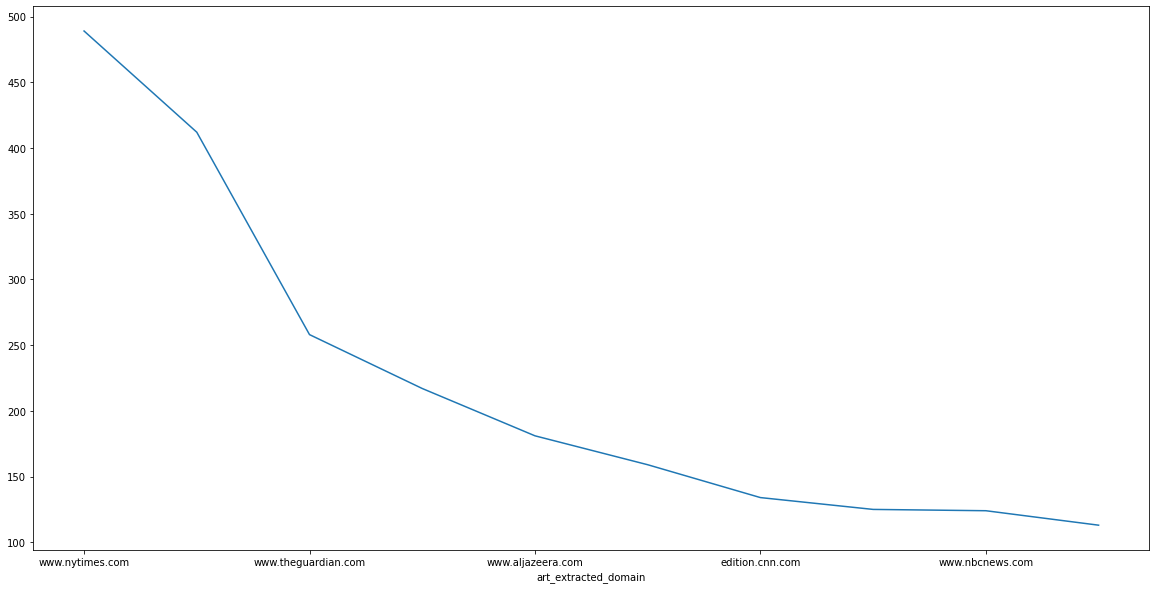

In [16]:
newsDF.groupby('art_extracted_domain')['art_extracted_domain'].count().sort_values(ascending=False)[:10].plot()

-----------------------------------

# Miscellaneous

In [13]:
from IPython.display import HTML

video_path = '../assets/trim.mov'

HTML("""
<video width="840" height="460" controls="">
<source src="{0}">
</video>
""".format(video_path))